In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.activations import relu
from keras.models import Model
from keras.layers import Reshape,Input, Lambda
from keras.utils import np_utils
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

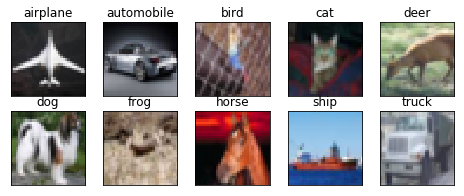

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0709 15:33:04.975014 139891436976000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0709 15:33:05.020930 139891436976000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 15:33:05.042465 139891436976000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0709 15:33:47.845721 139891436976000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 52s 133ms/step - loss: 1.8468 - acc: 0.2967 - val_loss: 1.5113 - val_acc: 0.4423
Epoch 2/50
390/390 [==============================] - 45s 116ms/step - loss: 1.3483 - acc: 0.5108 - val_loss: 1.1393 - val_acc: 0.5902
Epoch 3/50
390/390 [==============================] - 45s 116ms/step - loss: 1.1294 - acc: 0.6005 - val_loss: 0.9863 - val_acc: 0.6459
Epoch 4/50
390/390 [==============================] - 45s 116ms/step - loss: 0.9838 - acc: 0.6564 - val_loss: 0.8660 - val_acc: 0.6971
Epoch 5/50
390/390 [==============================] - 45s 116ms/step - loss: 0.8882 - acc: 0.6917 - val_loss: 0.7817 - val_acc: 0.7274
Epoch 6/50
390/390 [==============================] - 45s 116ms/step - loss: 0.8059 - acc: 0.7218 - val_loss: 0.7552 - val_acc: 0.7406
Epoch 7/50
390/390 [==============================] - 45s 116ms/step - loss: 0.7478 - acc: 0.7419 - val_loss: 0.7265 - val_acc: 0.7543
Epoch 8/50
390/390 [==============================] - 4

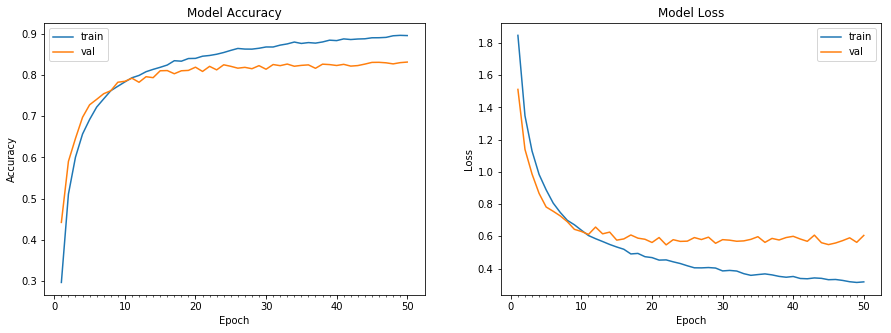

Accuracy on test data is: 83.10


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [12]:
from keras.layers import AveragePooling2D

model_input = Input(shape=(32, 32, 3))

#block1
x1 = Conv2D(32, (3, 3), activation='relu',padding='same')(model_input)
x1 = BatchNormalization()(x1)

# for separable convolution , i am using 3x1 and 1x3 normal convolution one after the other.
x1 = Conv2D(64, (3, 1), activation='relu',padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, (1, 3), activation='relu',padding='same')(x1)
x1 = BatchNormalization()(x1)

x1 = MaxPooling2D((2,2))(x1)
x1 = Dropout(0.2)(x1)


x1 = Conv2D(32, (1, 1), activation='relu')(x1)


#Grouped Conv block (3,3) & (5,5)
x2 = Conv2D(64, (3, 3), activation='relu',padding='same')(x1)
x2 = BatchNormalization()(x2)

x3 = Conv2D(64, (5, 5), activation='relu',padding='same')(x1)
x3 = BatchNormalization()(x3)

x4 = concatenate([x2,x3])

x4 = MaxPooling2D((2,2))(x4)
x4 = Dropout(0.3)(x4)

x4 = Conv2D(32, (1, 1), activation='relu')(x4)

#Grouped Conv block Conv2d(3,3) dilation rate (1,1) & Conv2d(3,3) with dilation rate (2,2)
x5 = Conv2D(128, (3, 3), dilation_rate=(1, 1), activation='relu',padding='same')(x4)
x5 = BatchNormalization()(x5)

x6 = Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu',padding='same')(x4)
x6 = BatchNormalization()(x6)

x7 = concatenate([x5,x6])

# Depthwise convolution is actually achieved using SeparableConv2D

x8 = SeparableConv2D(256,(3, 3), activation='relu',padding='same')(x7)
x8 = BatchNormalization()(x8)

x8 = MaxPooling2D((2,2))(x8)
x8 = Dropout(0.5)(x8)

x8 = Conv2D(10, (1, 1), activation='relu')(x8)
x8 = AveragePooling2D(4,4)(x8)
x8= Flatten()(x8)
x8 = Activation(activation='softmax')(x8)

model = Model(model_input, x8, name='cnn')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0709 16:26:40.117697 139891436976000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 32, 32, 32)   128         conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 32, 32, 64)   6208        batch_normalization_9[0][0]      
__________________________________________________________________________________________________
batch_norm

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

mc=ModelCheckpoint("best_file.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)



datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[mc,], verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 76s 194ms/step - loss: 1.3356 - acc: 0.5202 - val_loss: 1.3571 - val_acc: 0.5402

Epoch 00001: val_acc improved from -inf to 0.54020, saving model to best_file.h5
Epoch 2/50
390/390 [==============================] - 69s 177ms/step - loss: 0.9105 - acc: 0.6791 - val_loss: 0.9571 - val_acc: 0.6756

Epoch 00002: val_acc improved from 0.54020 to 0.67560, saving model to best_file.h5
Epoch 3/50
390/390 [==============================] - 69s 177ms/step - loss: 0.7629 - acc: 0.7313 - val_loss: 0.7424 - val_acc: 0.7470

Epoch 00003: val_acc improved from 0.67560 to 0.74700, saving model to best_file.h5
Epoch 4/50
390/390 [==============================] - 69s 176ms/step - loss: 0.6713 - acc: 0.7660 - val_loss: 0.7527 - val_acc: 0.7402

Epoch 00004: val_acc did not improve from 0.74700
Epoch 5/50
390/390 [==============================] - 69s 177ms/step - loss: 0.6096 - acc: 0.7877 - val_loss: 0.7000 - val_acc: 0.7554

Epoch 00005: val_acc 

Model took 3272.23 seconds to train


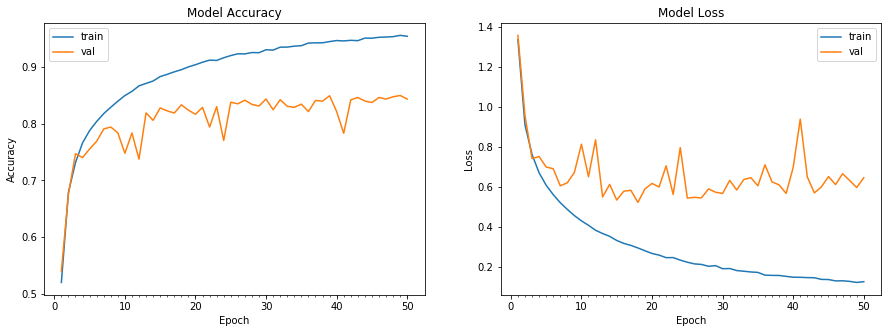

Accuracy on test data is: 84.95


In [15]:
end = time.time()
model.load_weights("best_file.h5")
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))